In [1]:
print(5 and 10)

10


In [2]:
print(5 or 10)

5


In [3]:
print(0 or 5)

5


In [4]:
print(5 or 0)

5


In [5]:
import pandas as pd
import numpy as np

In [8]:
arr = np.array([1,2,3,4])

In [9]:
arr.dtype

dtype('int64')

In [10]:
np.average(arr)

2.5

In [11]:
np.absolute(arr)

array([1, 2, 3, 4])

In [12]:
import array as arr
c = arr.array('f', [1.1, 2.2, 3.3])
print(c[1])

2.200000047683716


In [14]:
print(round(c[1]))

2


In [16]:
print(type(arr))

<class 'module'>


In [20]:
df = pd.read_csv("/Users/thomassimmons/Downloads/titanic.csv")

In [22]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [24]:
df.describe

<bound method NDFrame.describe of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                 

In [25]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [26]:
df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [27]:
df['Age'].fillna(df['Age'].median(), inplace=True)

In [35]:
df['Age']

0      22
1      38
2      26
3      35
4      35
       ..
886    27
887    19
888    28
889    26
890    32
Name: Age, Length: 891, dtype: int64

In [36]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [38]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin'],
      dtype='object')

In [39]:
df['Cabin'].isnull().sum()

687

In [40]:
df.drop(columns=['Cabin'], inplace=True)

In [41]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare'],
      dtype='object')

In [44]:
3 * 1 ** 3

3

In [45]:
print(type([]))

<class 'list'>


In [ ]:
import matplotlib.pyplot as plt

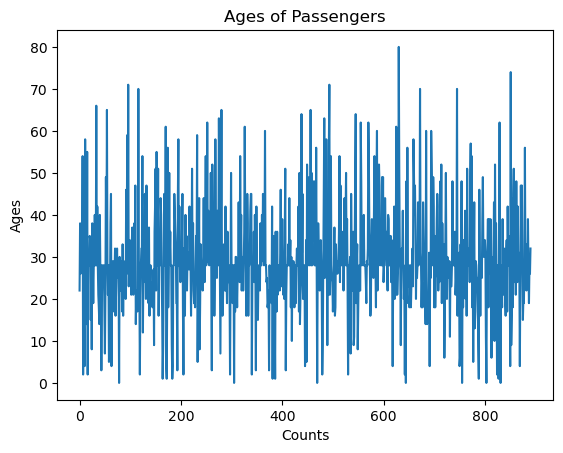

In [55]:
plt.plot(df['Age'])
plt.xlabel("Counts")
plt.ylabel("Ages")
plt.title("Ages of Passengers")
plt.show()

In [57]:
df.groupby('Age')['Survived'].mean()

Age
0     1.000000
1     0.714286
2     0.300000
3     0.833333
4     0.700000
        ...   
66    0.000000
70    0.000000
71    0.000000
74    0.000000
80    1.000000
Name: Survived, Length: 71, dtype: float64

In [58]:
df.groupby('Survived')['Pclass'].mean()

Survived
0    2.531876
1    1.950292
Name: Pclass, dtype: float64

In [61]:
df.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

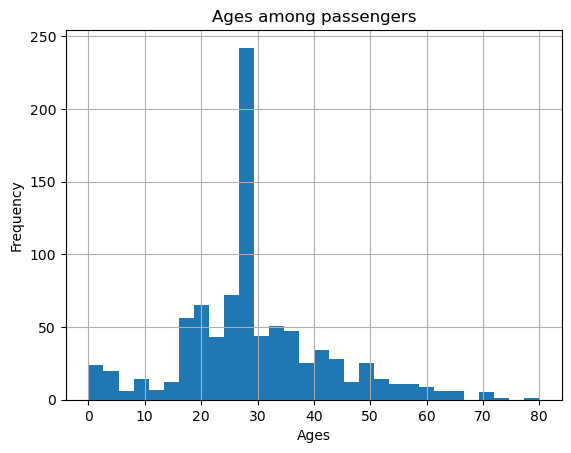

In [68]:
df['Age'].hist(bins=30)
plt.title("Ages among passengers")
plt.xlabel("Ages")
plt.ylabel("Frequency")
plt.show()

In [69]:
df.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [70]:
import seaborn as sns

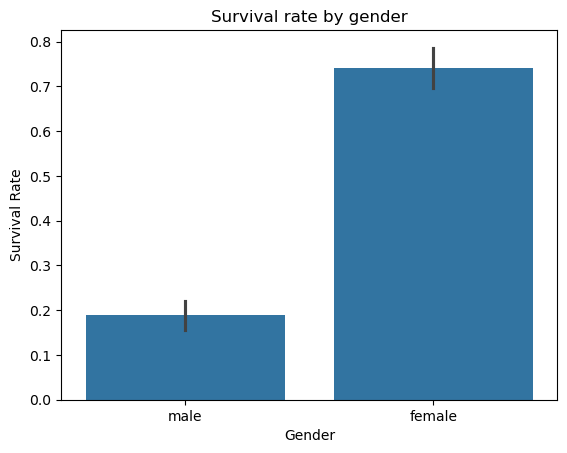

In [72]:
sns.barplot(x='Sex', y='Survived', data=df)
plt.title("Survival rate by gender")
plt.xlabel("Gender")
plt.ylabel("Survival Rate")
plt.show()

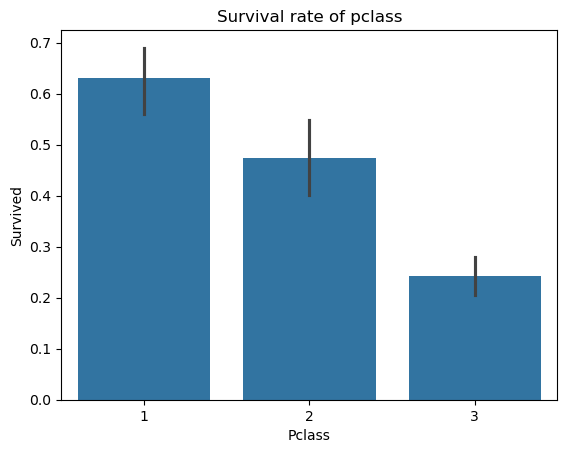

In [74]:
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title("Survival rate of pclass")
plt.show()

In [75]:
import sqlite3

In [46]:
bool("False")

True

In [37]:
df.drop(columns=['Embarked'], inplace=True)

In [34]:
df['Age'] = df['Age'].astype('int64')

In [76]:
import sqlite3

In [77]:
conn = sqlite3.connect(':memory:')

In [78]:
cursor = conn.cursor()

In [79]:
df.to_sql('titanic', conn, index=False, if_exists='replace')

891

In [82]:
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
print(tables)

[('titanic',)]


In [84]:
cursor.execute("PRAGMA table_info(titanic);")
columns = cursor.fetchall()
for col in columns:
    print(col)

(0, 'PassengerId', 'INTEGER', 0, None, 0)
(1, 'Survived', 'INTEGER', 0, None, 0)
(2, 'Pclass', 'INTEGER', 0, None, 0)
(3, 'Name', 'TEXT', 0, None, 0)
(4, 'Sex', 'TEXT', 0, None, 0)
(5, 'Age', 'INTEGER', 0, None, 0)
(6, 'SibSp', 'INTEGER', 0, None, 0)
(7, 'Parch', 'INTEGER', 0, None, 0)
(8, 'Ticket', 'TEXT', 0, None, 0)
(9, 'Fare', 'REAL', 0, None, 0)
